Martin Mendoza\
Parkinson's Detection Model - Personal Project\
08/27/25

### Project

· Using an XGBoost model to predict Parkinson's disease within patients. The model is trained with early stopping on the validation set to prevent overfitting.\
· the dataset im working with contains differnevt voice features such as pitch, jitter and shimmer, including a status column indicated whther or not the patient has parkinson's (1) or is healthy (0).\
· Visualization of the model are shown at the end

In [1]:
# imports
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# data
cwd = os.getcwd()
df = pd.read_csv(cwd + '/parkinsons_data.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Data Preperation

Cleaning the data:\
· Using pandas, check for null values and duplicate rows\
· Drop non feature columns

In [3]:
# Check for null values
print("Null values per column:")
print(df.isnull().sum())

# check for duplicate rows
print("\nNumer of duplicate rows: ", df.duplicated().sum())

# drop non feature columns
if 'name' in df.columns:
    df = df.drop(columns='name')

Null values per column:
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Numer of duplicate rows:  0


In [4]:
# data
print(f"Cleaned data columns: \n{df.columns}\n")
print(df.describe())

Cleaned data columns: 
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP

In [5]:
# target value counts
print(f"status value counts:\n{df['status'].value_counts()}") # 1 indicates parkinson's, 0 indicates healthy
# 147 healthy, 48 with Parkinson's

status value counts:
status
1    147
0     48
Name: count, dtype: int64


### Train Test Split

Splitting the data:\
· Seperate target columns (status) from features\
· 80% training data, 10% Validation and 10% testing

In [6]:
# features and target
X = df.drop(columns=["status"])
y = df["status"] # 1 indicates parkinson's, 0 indicates healthy

In [7]:
# take 80% as training data
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, train_size=0.8)

# split the remaining data into 10% validation and 10% testing
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, train_size=0.5)

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Testing set: {len(X_test)} samples")

Training set: 156 samples
Validation set: 19 samples
Testing set: 20 samples


### Training the Model

XGBoost:\
· Train with early stopping (using validation)\
· Early stopping tells XGBoost to stop training once validation performance stops improving, which prevents overfitting.

In [8]:
# train the model
model = xgb.XGBClassifier(
    use_label_encoder=False, # avoid warnings
    eval_metric='logloss', # evaluation metric
    n_estimators=500, # high number for early stopping
    learning_rate=0.05, # low learning rate for better performance
    max_depth=3, # limit depth to avoid overfitting
    random_state=42, # for reproducibility
    early_stopping_rounds=20, # stop if no improvement for 20 rounds
)

self notes:\
· we are using logloss as its standard for binary classification\
· we can use a high number of n_estimators because early stopping will stop the model before reaching 500 rounds.\
· since we have more rounds, we can lower the learning rate for better performance\
· we lower the max_depth to avoid over fitting\
· early_stopping_rounds is set to x so that when the model doesnt improve after x rounds it will stop training

In [9]:
# train with early stopping
model.fit(
    X_train, y_train, # training data
    eval_set=[(X_val, y_val)], # validation set
    verbose=True # show progress
)

[0]	validation_0-logloss:0.56749
[1]	validation_0-logloss:0.56170
[2]	validation_0-logloss:0.55490
[3]	validation_0-logloss:0.54739
[4]	validation_0-logloss:0.54383
[5]	validation_0-logloss:0.53637
[6]	validation_0-logloss:0.52265
[7]	validation_0-logloss:0.51215
[8]	validation_0-logloss:0.50261
[9]	validation_0-logloss:0.49394
[10]	validation_0-logloss:0.48484
[11]	validation_0-logloss:0.48099
[12]	validation_0-logloss:0.47137
[13]	validation_0-logloss:0.46646
[14]	validation_0-logloss:0.45645
[15]	validation_0-logloss:0.44875
[16]	validation_0-logloss:0.44165
[17]	validation_0-logloss:0.43307
[18]	validation_0-logloss:0.42999
[19]	validation_0-logloss:0.42734
[20]	validation_0-logloss:0.42490
[21]	validation_0-logloss:0.42099
[22]	validation_0-logloss:0.41776
[23]	validation_0-logloss:0.41595
[24]	validation_0-logloss:0.41458
[25]	validation_0-logloss:0.40968
[26]	validation_0-logloss:0.40864
[27]	validation_0-logloss:0.40411
[28]	validation_0-logloss:0.40375
[29]	validation_0-loglos

c:\Users\marti\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:05:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[161]	validation_0-logloss:0.20500
[162]	validation_0-logloss:0.20574
[163]	validation_0-logloss:0.20612
[164]	validation_0-logloss:0.20551
[165]	validation_0-logloss:0.20548
[166]	validation_0-logloss:0.20393
[167]	validation_0-logloss:0.20407
[168]	validation_0-logloss:0.20256
[169]	validation_0-logloss:0.20329
[170]	validation_0-logloss:0.20181
[171]	validation_0-logloss:0.20169
[172]	validation_0-logloss:0.20185
[173]	validation_0-logloss:0.20052
[174]	validation_0-logloss:0.19936
[175]	validation_0-logloss:0.19973
[176]	validation_0-logloss:0.19844
[177]	validation_0-logloss:0.19858
[178]	validation_0-logloss:0.19731
[179]	validation_0-logloss:0.19619
[180]	validation_0-logloss:0.19621
[181]	validation_0-logloss:0.19498
[182]	validation_0-logloss:0.19512
[183]	validation_0-logloss:0.19436
[184]	validation_0-logloss:0.19309
[185]	validation_0-logloss:0.19187
[186]	validation_0-logloss:0.19256
[187]	validation_0-logloss:0.19137
[188]	validation_0-logloss:0.19131
[189]	validation_0-l

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

### Evaluation and Visualization

Evaluation\
· Using a classification report to view the models accuracy with the test set\
· Classification report includes f1-score, recall and percision

Visualization\
· Feature importance visualization to show the impact of each column when predicting the status\
· Accuracy visualization to show predicted vs label of the model

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification metrics
print(classification_report(y_test, y_pred))

Test Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.94      1.00      0.97        16

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



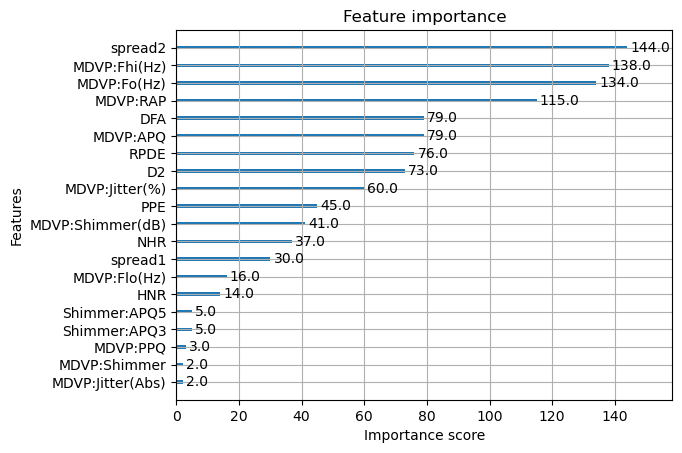

In [11]:
#visualize feature importance
xgb.plot_importance(model)
plt.show()

This graph shows the importance of each column and their impact on the model's predictions.\
By looking at the graph we can see which moice measurements are most indicative of parkinson's.

In [12]:
# Combine actual and predicted labels into a single DataFrame
results = pd.DataFrame({
    'Patient': range(len(y_test)),  # just a simple index for each patient
    'Actual': y_test.values,
    'Predicted': model.predict(X_test)
})

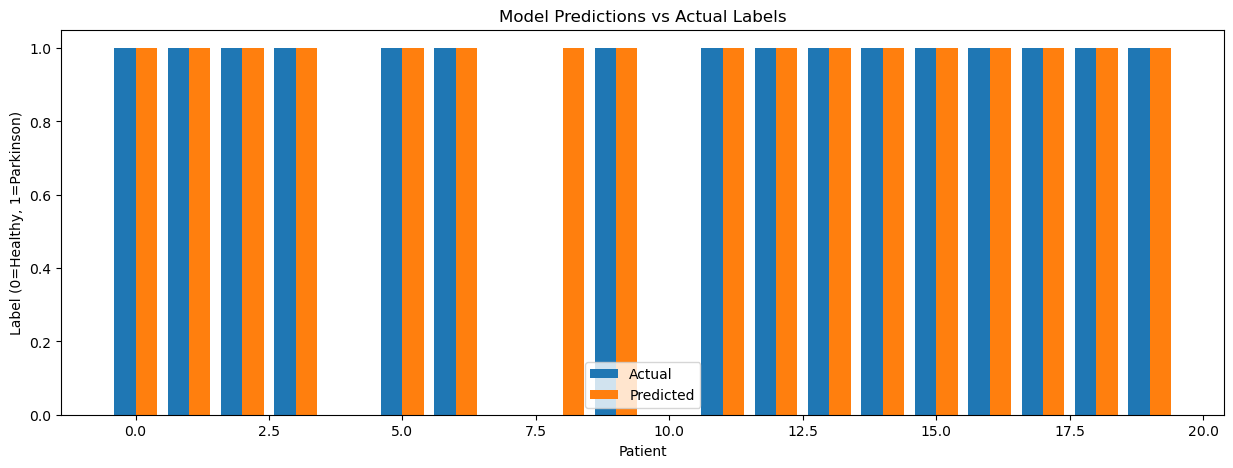

Prediction Accuracy: 95.00%


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# plot actual vs predicted
x = np.arange(len(results))

plt.figure(figsize=(15,5))
plt.bar(x - 0.2, results['Actual'], width=0.4, label='Actual')
plt.bar(x + 0.2, results['Predicted'], width=0.4, label='Predicted')

plt.xlabel('Patient')
plt.ylabel('Label (0=Healthy, 1=Parkinson)')
plt.title('Model Predictions vs Actual Labels')
plt.legend()
plt.show()

# show prediction accuracy
accuracy = (results['Actual'] == results['Predicted']).mean() * 100
print(f"Prediction Accuracy: {accuracy:.2f}%")